# A. Image processing with Histogram






## A.1 Histogram streching
This examples enhances an image with low contrast, using a method called histogram streching.

In [ ]:
# First we import the library
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8

In [ ]:
# Load an example image
img = data.moon()
img=img.astype(np.uint8) # I convert the image and put it into 8 bits
img_pil =Image.fromarray(img) # I convert from a numpy array to a Pil image

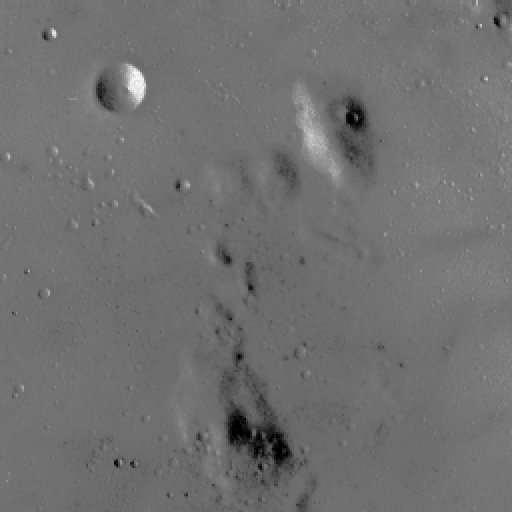

In [ ]:
# let us see the image
img_pil

We can see that the contrast is not that good. Let us have a look at the histrogram

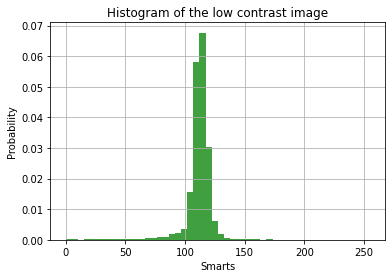

In [ ]:

n, bins, patches = plt.hist(img.ravel(), 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('intensity level')
plt.ylabel('Probability')
plt.title('Histogram of the low contrast image')
plt.grid(True)
plt.show()

In [ ]:
# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98)) # read the documentation of rescale_intensity
img_rescale=img_rescale.astype(np.uint8) # I convert the image and put it into 8 bits
img_pil =Image.fromarray(img_rescale) # I convert from a numpy array to a Pil image

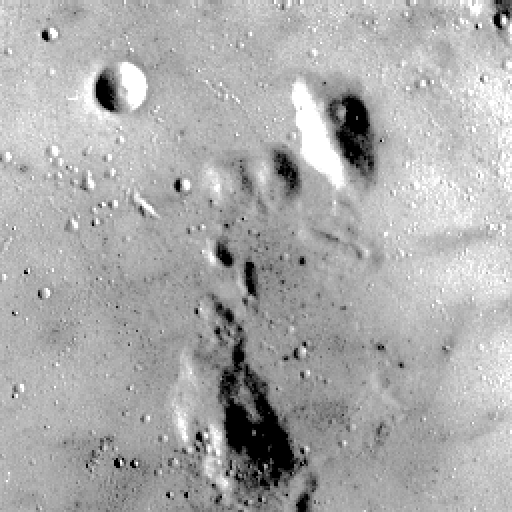

In [ ]:
img_pil

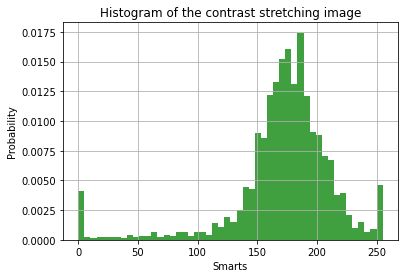

In [ ]:
n, bins, patches = plt.hist(img_rescale.ravel(), 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('intensity level')
plt.ylabel('Probability')
plt.title('Histogram of the contrast stretching image')
plt.grid(True)
plt.show()

## A.2 Histogram matchning
This example demonstrates the feature of histogram matching. It manipulates the pixels of an input image so that its histogram matches the histogram of the reference image. If the images have multiple channels, the matching is done independently for each channel, as long as the number of channels is equal in the input image and the reference.



In [ ]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms



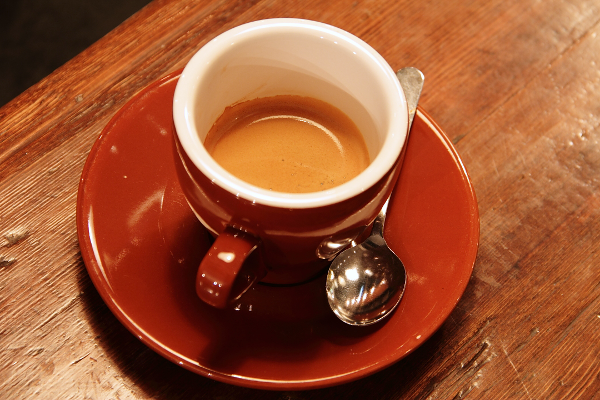

In [ ]:
reference = data.coffee()

reference=reference.astype(np.uint8)
reference_pil =Image.fromarray(reference)
reference_pil

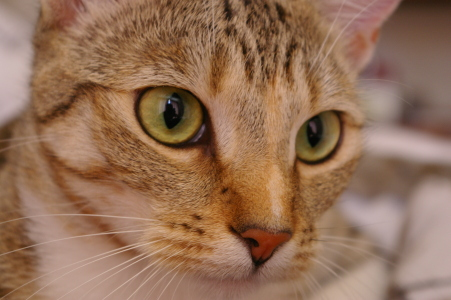

In [ ]:
image = data.chelsea()
image=image.astype(np.uint8)
image_pil =Image.fromarray(image)
image_pil

In [ ]:
matched = match_histograms(image, reference)
matched=matched.astype(np.uint8)
matched_pil =Image.fromarray(matched)
matched_pil

NameError: ignored

Please plot the histrogramm of the three images

## A.2 Thresholding
Thresholding is used to create a binary image from a grayscale image

In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu

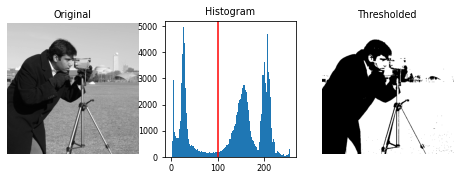

In [ ]:
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()


# B. Image processing with Fourier




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import gaussian
from  skimage.util import random_noise
from scipy.fft import fft2, fftshift
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage.data import astronaut
from skimage.filters import window



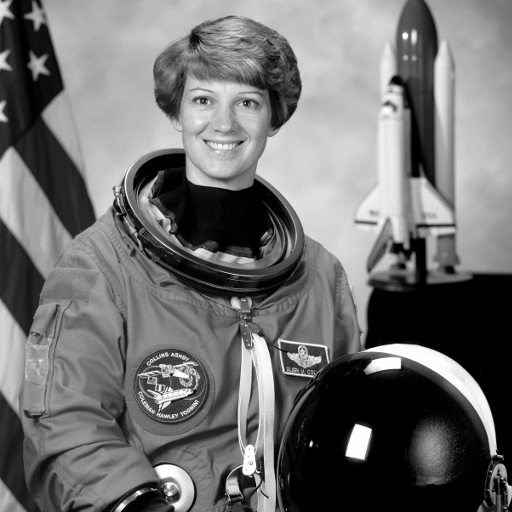

In [ ]:
image = img_as_float(rgb2gray(astronaut()))
image=(255*image).astype(np.uint8)
image_pil =Image.fromarray(image)
image_pil

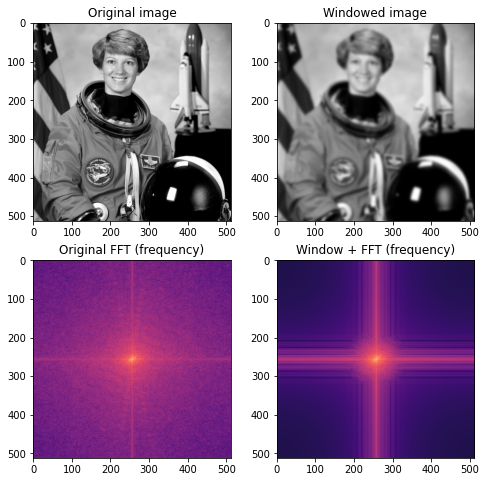

In [ ]:

filtered_img = gaussian(image, sigma=3)

image_f = np.abs(fftshift(fft2(image)))
filtered_img_f = np.abs(fftshift(fft2(filtered_img)))

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()
ax[0].set_title("Original image")
ax[0].imshow(image, cmap='gray')
ax[1].set_title("Windowed image")
ax[1].imshow(filtered_img, cmap='gray')
ax[2].set_title("Original FFT (frequency)")
ax[2].imshow(np.log(image_f), cmap='magma')
ax[3].set_title("Window + FFT (frequency)")
ax[3].imshow(np.log(filtered_img_f), cmap='magma')
plt.show()

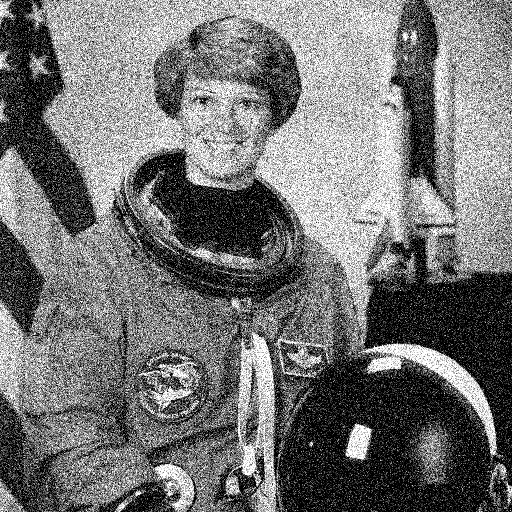

In [ ]:
#Let us noise the image
image2=((image).astype(np.float16))/255.0

image_noisy = random_noise(image2, mode='gaussian', mean=0,var=0.05)
image_noisy=(255*image_noisy).astype(np.uint8)
image_pil =Image.fromarray(image_noisy)
image_pil

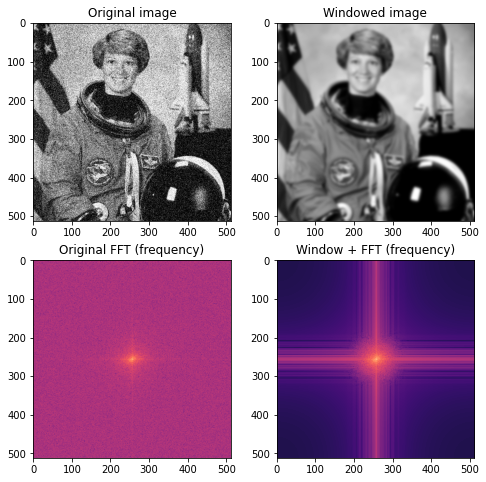

In [ ]:
filtered_img = gaussian(image, sigma=3)

image_f = np.abs(fftshift(fft2(image_noisy)))
filtered_img_f = np.abs(fftshift(fft2(filtered_img)))

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()
ax[0].set_title("Original image")
ax[0].imshow(image_noisy, cmap='gray')
ax[1].set_title("Windowed image")
ax[1].imshow(filtered_img, cmap='gray')
ax[2].set_title("Original FFT (frequency)")
ax[2].imshow(np.log(image_f), cmap='magma')
ax[3].set_title("Window + FFT (frequency)")
ax[3].imshow(np.log(filtered_img_f), cmap='magma')
plt.show()

please I want to see the image of just the high frequency. What does it look like



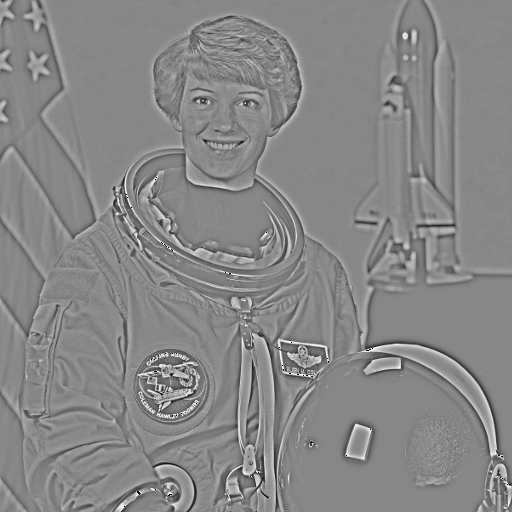

In [ ]:
image = img_as_float(rgb2gray(astronaut()))
image=(255*image).astype(np.uint8)

filtered_img = image.astype(np.float16) /255.0-gaussian(image, sigma=3)
filtered_img =filtered_img -np.min(filtered_img)
filtered_img=(255*filtered_img).astype(np.uint8)
image_pil =Image.fromarray(filtered_img)
image_pil

# C. Image processing with Filter
We will consider to noise the gaussian noise and the salt and paper noise.

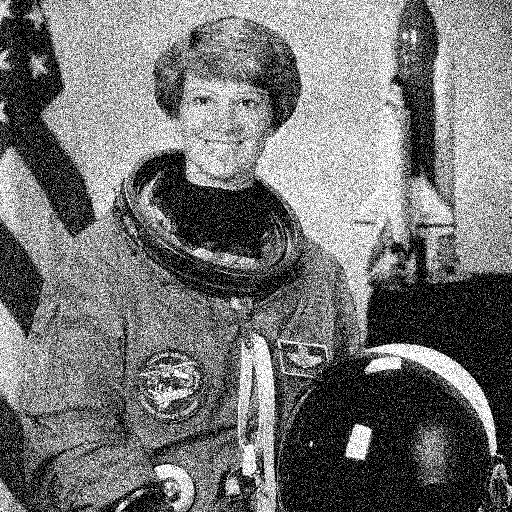

In [ ]:
# gaussian noise

image2=((image).astype(np.float16))/255.0

image_gaussiannoisy = random_noise(image2, mode='gaussian', mean=0,var=0.05)
image_gaussiannoisy=(255*image_gaussiannoisy).astype(np.uint8)
image_pil =Image.fromarray(image_gaussiannoisy)
image_pil

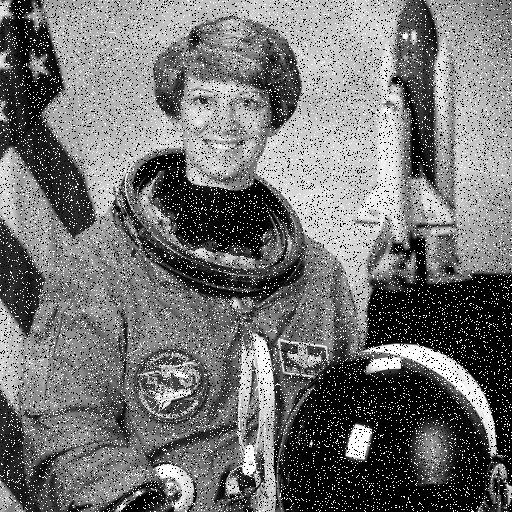

In [ ]:
# salt and pepper noise

image_sandp = random_noise(image2, mode='s&p', amount=0.15)
image_sandp=(255*image_sandp).astype(np.uint8)
image_pil =Image.fromarray(image_sandp)
image_pil

## C.1 median filter

In [ ]:
from skimage.filters.rank import median
from skimage.morphology import disk, ball

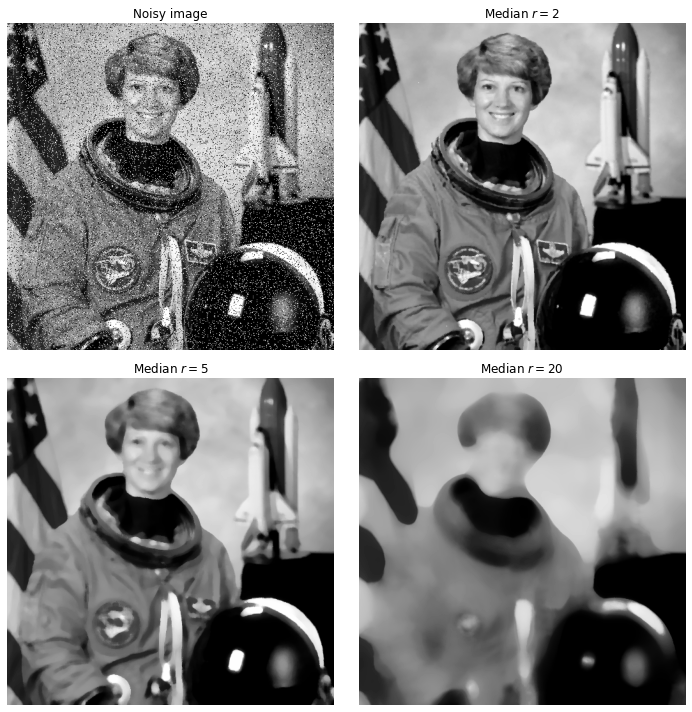

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image_sandp, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title('Noisy image')

ax[1].imshow(median(image_sandp, disk(2)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].set_title('Median $r=2$')

ax[2].imshow(median(image_sandp, disk(5)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[2].set_title('Median $r=5$')

ax[3].imshow(median(image_sandp, disk(20)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[3].set_title('Median $r=20$')

for a in ax:
    a.axis('off')

plt.tight_layout()


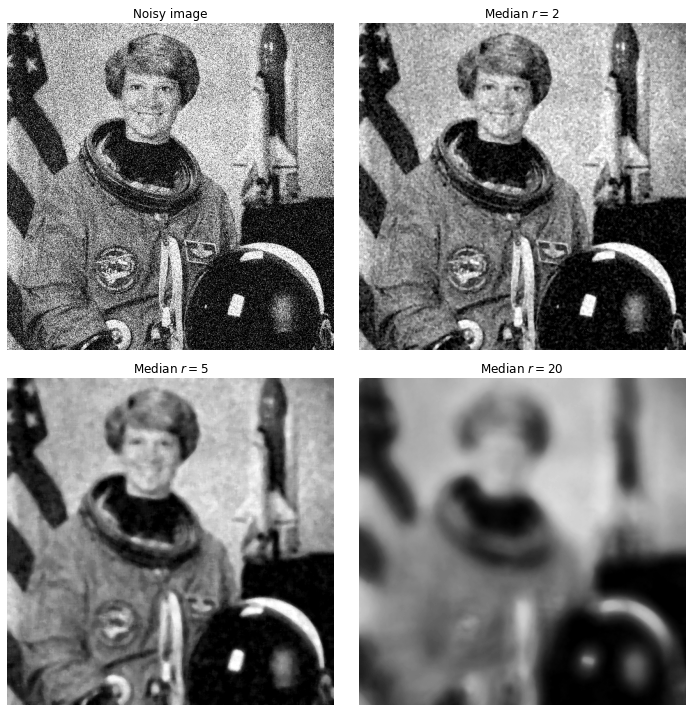

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image_gaussiannoisy, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title('Noisy image')

ax[1].imshow(median(image_gaussiannoisy, disk(2)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].set_title('Median $r=2$')

ax[2].imshow(median(image_gaussiannoisy, disk(5)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[2].set_title('Median $r=5$')

ax[3].imshow(median(image_gaussiannoisy, disk(20)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[3].set_title('Median $r=20$')

for a in ax:
    a.axis('off')

plt.tight_layout()

**what can you say about the median filter?**

## C.2 Gaussian Filter

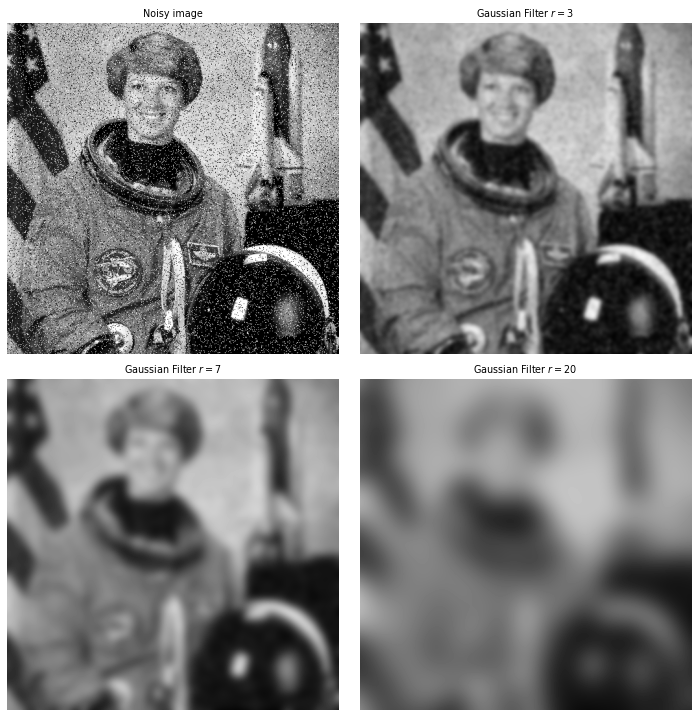

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image_sandp, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title('Noisy image')

ax[1].imshow(255*gaussian(image_sandp, sigma=3), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].set_title('Gaussian Filter $r=3$')

ax[2].imshow(255*gaussian(image_sandp, sigma=7), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[2].set_title('Gaussian Filter $r=7$')

ax[3].imshow(255*gaussian(image_sandp, sigma=20), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[3].set_title('Gaussian Filter $r=20$')

for a in ax:
    a.axis('off')

plt.tight_layout()

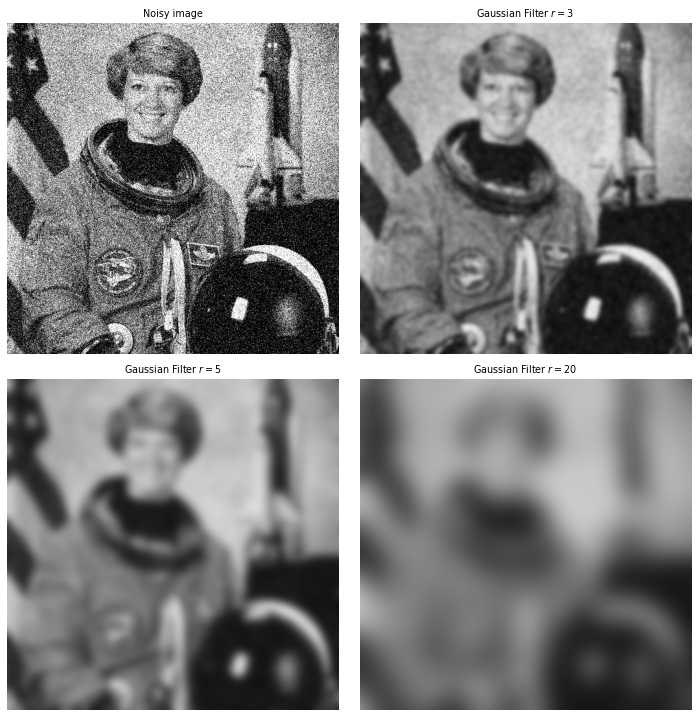

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image_gaussiannoisy, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title('Noisy image')

ax[1].imshow(255*gaussian(image_gaussiannoisy, sigma=3), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].set_title('Gaussian Filter $r=3$')

ax[2].imshow(255*gaussian(image_gaussiannoisy, sigma=7), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[2].set_title('Gaussian Filter $r=7$')

ax[3].imshow(255*gaussian(image_gaussiannoisy, sigma=20), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[3].set_title('Gaussian Filter $r=20$')

for a in ax:
    a.axis('off')

plt.tight_layout()

**what can you say about the Gaussian filter?**

# D. Image processing with Mathematical Morphology

## D.1 Erosion

In [ ]:
import numpy as np
from skimage.morphology import erosion, dilation,binary_erosion, opening, closing, white_tophat, reconstruction, area_opening
from skimage.morphology import black_tophat, skeletonize, convex_hull_image,extrema
from skimage.morphology import square, diamond, octagon, rectangle, star, disk, label
from skimage.segmentation import watershed
from PIL import Image
from scipy import ndimage as ndi
from skimage.util import img_as_ubyte
from skimage import data, util, filters, color
import math
from skimage import io, color
from skimage import segmentation
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import torch
import torch.nn as nn
import torch.nn.functional as F
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries

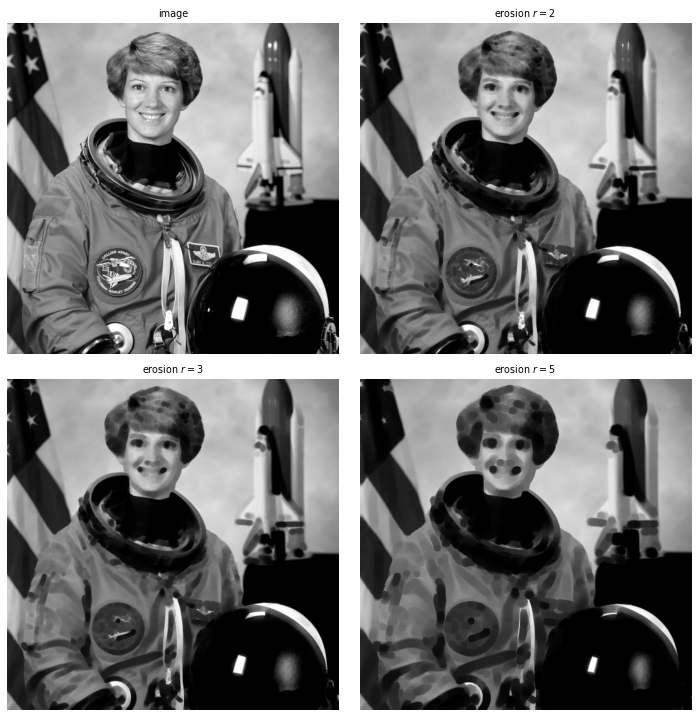

In [ ]:
#imgGrad = dilation(lab[:,:,0], scale1[i]) - erosion(lab[:,:,0], scale1[i])

fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title('image')

ax[1].imshow(erosion(image, disk(2)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].set_title('erosion $r=2$')

ax[2].imshow(erosion(image, disk(3)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[2].set_title('erosion $r=3$')

ax[3].imshow(erosion(image, disk(5)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[3].set_title('erosion $r=5$')

for a in ax:
    a.axis('off')

plt.tight_layout()

## D.2 Dilation

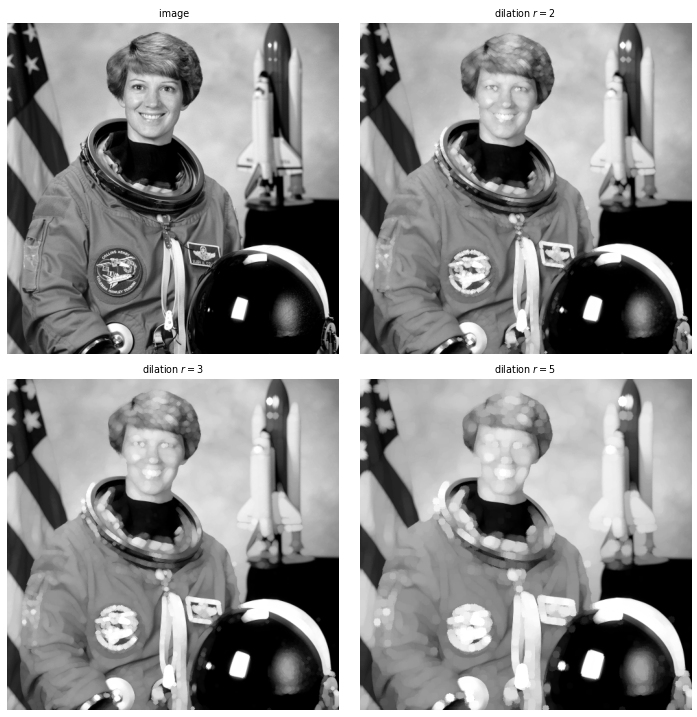

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title(' image')

ax[1].imshow(dilation(image, disk(2)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].set_title('dilation $r=2$')

ax[2].imshow(dilation(image, disk(3)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[2].set_title('dilation $r=3$')

ax[3].imshow(dilation(image, disk(5)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[3].set_title('dilation $r=5$')

for a in ax:
    a.axis('off')

plt.tight_layout()

## D.3 Opening

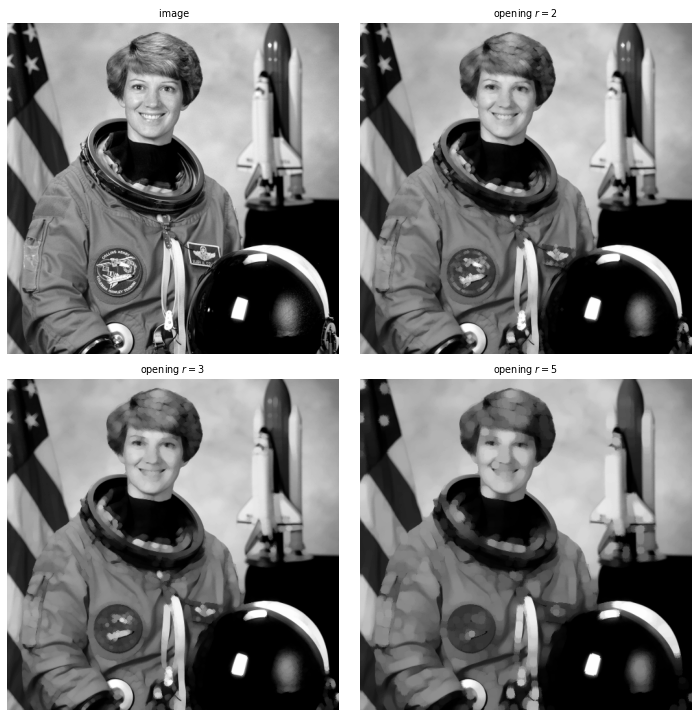

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title(' image')

ax[1].imshow(opening(image, disk(2)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].set_title('opening $r=2$')

ax[2].imshow(opening(image, disk(3)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[2].set_title('opening $r=3$')

ax[3].imshow(opening(image, disk(5)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[3].set_title('opening $r=5$')

for a in ax:
    a.axis('off')

plt.tight_layout()

## D.4 Closing

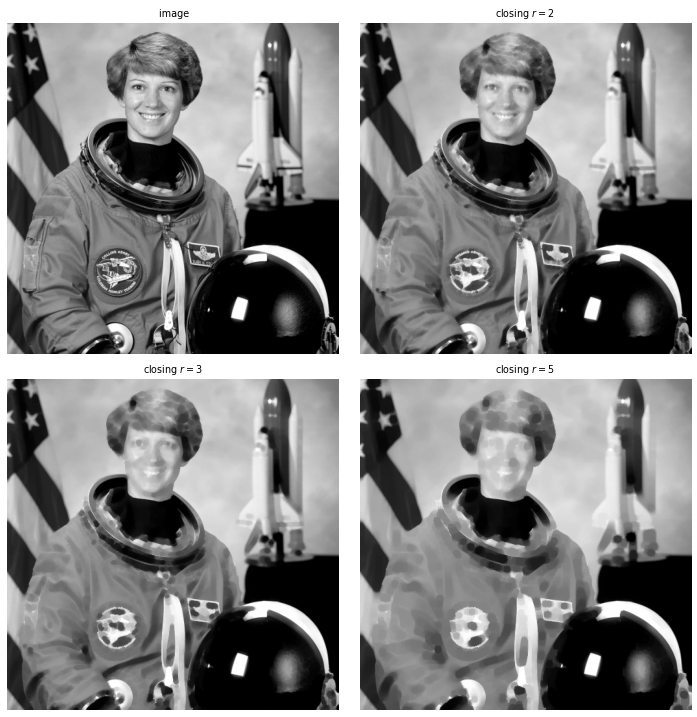

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title(' image')

ax[1].imshow(closing(image, disk(2)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].set_title('closing $r=2$')

ax[2].imshow(closing(image, disk(3)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[2].set_title('closing $r=3$')

ax[3].imshow(closing(image, disk(5)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[3].set_title('closing $r=5$')

for a in ax:
    a.axis('off')

plt.tight_layout()

## D.5 morphological gradient

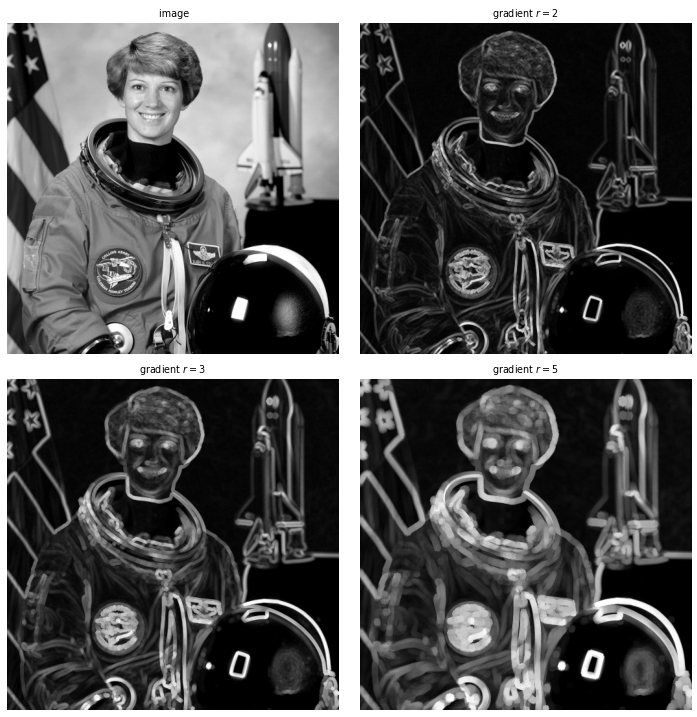

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, vmin=0, vmax=255, cmap=plt.cm.gray)
ax[0].set_title(' image')

ax[1].imshow(dilation(image, disk(2)) -erosion(image, disk(2)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].set_title('gradient $r=2$')

ax[2].imshow(dilation(image, disk(3))-erosion(image, disk(3)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[2].set_title('gradient $r=3$')

ax[3].imshow(dilation(image, disk(5))-erosion(image, disk(5)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax[3].set_title('gradient $r=5$')

for a in ax:
    a.axis('off')

plt.tight_layout()

## D.6 Segmentation

In [ ]:
gradient = dilation(image, disk(3))-erosion(image, disk(3))

In [ ]:
def contrasted_watershed(grad,threshold=0.01):
    # description
    # this code will calculate watershed of the most constrasted area
    # input :image gradient
    # input :contrast of the local minima that we discard
    # output : labels_waterhed an image with a label by cluster
    grad = grad - np.amin(grad)
    grad = grad / np.amax(grad)
    local_minima = extrema.h_minima(grad, threshold)
    #Image.fromarray(255 * local_minima).show('local minima')

    seeds = label(local_minima)#, neighbors=4)

    #local_minima = local_minima.astype(np.uint8)
    labels_waterhed = watershed(grad, seeds)
    return labels_waterhed

def mosaic(luminance,labels_waterhed):
      # description
    # this transform the luminance image on mosaic image
    # input :image luminance
    # input : the clustering results
    # output : mosaic image
    luminance = np.asarray(luminance).astype(np.float16)
    img_mosaic = np.zeros((luminance.shape[0], luminance.shape[1]))
    #img_mosaic_2 = np.zeros((luminance.shape[0], luminance.shape[1]))
    nb_cluster=np.amax(labels_waterhed)
    for i in range(nb_cluster):
        img_mosaic[labels_waterhed == i] = np.mean(luminance[labels_waterhed == i])


    '''img_mosaic[:, :, 0] = img_mosaic_r
    img_mosaic[:, :, 1] = img_mosaic_g
    img_mosaic[:, :, 2] = img_mosaic_b'''
    img_mosaic = np.asarray(img_mosaic).astype(np.uint8)
    return img_mosaic

In [ ]:
labels_waterhed =contrasted_watershed(gradient,threshold=0.1)


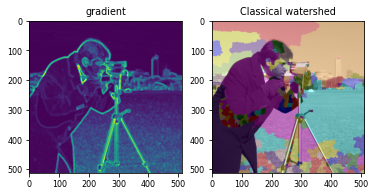

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2)

ax0.imshow(gradient)
ax0.set_title('gradient')

ax1.imshow(color.label2rgb(labels_waterhed, image, bg_label=-1))
ax1.set_title('Classical watershed')

plt.show()